PCA

conda create -n pca --> 
conda activate pca

In [1]:
%pip install torch
%pip install pandas
%pip install matplotlib
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



In [2]:
# Temporary fix to kernel not responding
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

# Import necessary libraries
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def perform_svd(data):
    # Convert the data into a PyTorch tensor
    tensor_data = torch.Tensor(data.values)

    # Compute the SVD where S is the eigenvalues and V is the eigenvectors
    U, S, V = torch.linalg.svd(tensor_data)

    return U, S, V, tensor_data

def display_shape(S, V):
    print("Shape of eigenvalues (S):", S.shape)
    print("Shape of eigenvectors (V):", V.shape)

Perform PCA to the data you choose!

In [4]:
# Load the data
data = pd.read_csv('../epsilon5/gene.data', sep=" ", header=None)

U, S, V, tensor_data = perform_svd(data)
display_shape(S, V)

Shape of eigenvalues (S): torch.Size([48])
Shape of eigenvectors (V): torch.Size([48, 48])


Covariance matrix

In [5]:
def calculate_covariance_matrix(V, S):
    # Calculate the covariance matrix
    cov_matrix = torch.mm(torch.mm(V, torch.diag(S)), V.t())

    # Print the covariance matrix
    print('Covariance Matrix:')
    print(cov_matrix)
    print('cov_matrix = ',cov_matrix.shape)


In [6]:

calculate_covariance_matrix(V, S)

Covariance Matrix:
tensor([[ 2.7452e+05,  2.6637e+05,  3.7808e+05,  ..., -6.3974e+01,
          3.1237e+02, -9.0891e+01],
        [ 2.6637e+05,  4.9228e+05,  6.3805e+05,  ...,  5.0337e+02,
          9.6190e+02,  5.0942e+02],
        [ 3.7808e+05,  6.3805e+05,  1.8614e+06,  ...,  2.4384e+02,
          2.9794e+03,  4.8068e+02],
        ...,
        [-6.3974e+01,  5.0337e+02,  2.4384e+02,  ...,  7.7917e+04,
         -5.3672e+03,  1.0260e+03],
        [ 3.1237e+02,  9.6190e+02,  2.9794e+03,  ..., -5.3672e+03,
          8.0281e+04,  3.2036e+03],
        [-9.0891e+01,  5.0942e+02,  4.8068e+02,  ...,  1.0260e+03,
          3.2036e+03,  7.2761e+04]])
cov_matrix =  torch.Size([48, 48])


Variance of the components

In [7]:
def calculate_cumulative_variance(S):
    # Calculate the variance explained by each principal component
    variance_explained = (S ** 2) / torch.sum(S ** 2)

    # Calculate the cumulative variance explained
    cumulative_variance_explained = torch.cumsum(variance_explained, dim=0)

    # Plot the scree graph
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(variance_explained) + 1), cumulative_variance_explained, linestyle='-', marker='x', color='red')
    plt.xlabel('Principal Component')
    plt.ylabel('Cumulative Variance Explained (%)')
    plt.title('Scree Graph')
    # plt.savefig('scree_graph_.png')  # Save the figure as an image
    plt.show()

    return cumulative_variance_explained

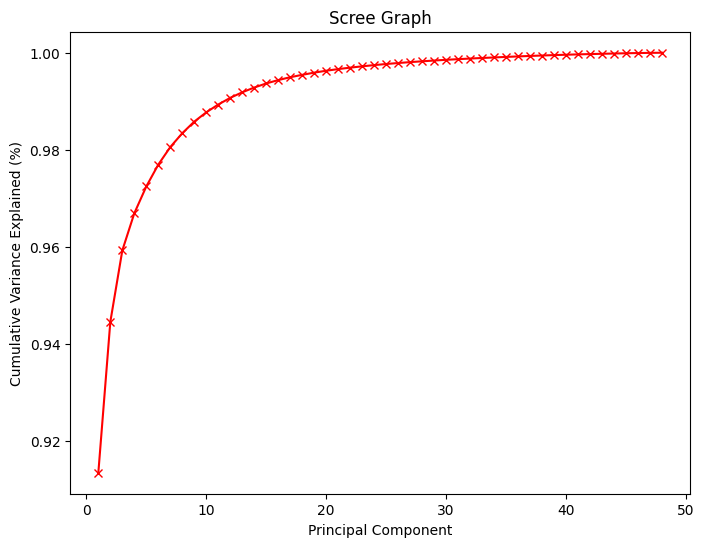

In [8]:
cumulative_variance = calculate_cumulative_variance(S)

Decide: desired_variance = 1 - maximum information loss 

In [9]:
desired_variance = 0.99

In [10]:
def get_num_components(cumulative_variance_explained, desired_variance):
    num_components = torch.sum(cumulative_variance_explained < desired_variance) + 1
    return num_components.item()


num_components_needed = get_num_components(cumulative_variance, desired_variance)
print("Number of principal components needed for a cumulative variance explained of", desired_variance, ":", num_components_needed, " components")

Number of principal components needed for a cumulative variance explained of 0.99 : 12  components


In [11]:
import pandas as pd

# Project the tensor_data onto the plane formed by the principal components
new_coordinates = torch.matmul(tensor_data,V[:, :num_components_needed])

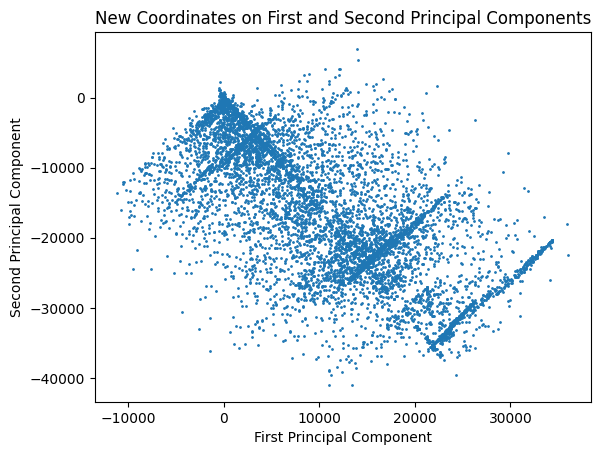

In [12]:
plt.scatter(new_coordinates[:, 0], new_coordinates[:, 1], s=1)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('New Coordinates on First and Second Principal Components')
plt.show()

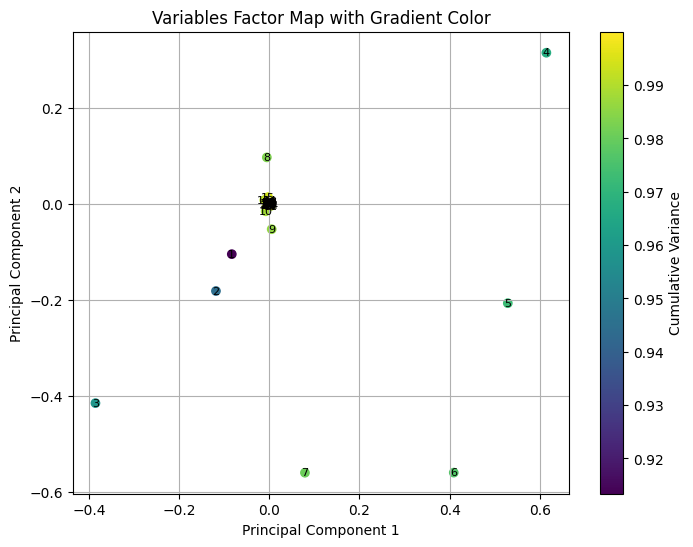

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(V[:, 0], V[:, 1], c=cumulative_variance, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Variables Factor Map with Gradient Color')

# Label each component
for i, (x, y) in enumerate(zip(V[:, 0], V[:, 1])):
    plt.text(x, y, f'{i+1}', fontsize=8, ha='center', va='center')

plt.grid(True)
plt.colorbar(label='Cumulative Variance')
plt.show()